# Background

The owner of a company would like to be able to predict whether employees will stay with the company or leave. 

## Data Description

The data contains information about various characteristics of employees. Please note that the dataset has been updated to account for repetitions, which is needed for Goodness of Fit Assessment. See below for the description of these characteristics. 

1. **Age.Group**: 1-9 (1 corresponds to teen, 2 corresponds to twenties, etc.) 
2. **Gender**: 1 if male, 0 if female 
3. **Tenure**: Number of years with the company 
4. **Num.Of.Products**: Number of products owned 
5. **Is.Active.Member**: 1 if active member, 0 if inactive member 
6. **Staying**: Fraction of employees that stayed with the company for a given set of predicting variables.

## Setup

You can import the data and set up the problem with the following R code:

In [1]:
# Import the data
rawdata = read.csv("hw4_data.csv", header=TRUE, fileEncoding="UTF-8-BOM")

# Create variable Staying
rawdata$Staying = rawdata$Stay/rawdata$Employees

# Set variables as categoricals
rawdata$Num.Of.Products<-as.factor(rawdata$Num.Of.Products)
rawdata$Age.Group<-as.factor(rawdata$Age.Group)
rawdata$Gender<-as.factor(rawdata$Gender)
rawdata$Is.Active.Member<-as.factor(rawdata$Is.Active.Member)

# Print head of data
head(rawdata)

,Age.Group,Gender,Tenure,Num.Of.Products,Is.Active.Member,Stay,Employees,Staying
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<dbl>
1,2,1,3,1,0,5,11,0.4545455
2,2,1,4,1,0,5,10,0.5000000
3,2,1,4,1,1,2,13,0.1538462
4,2,0,7,1,0,3,10,0.3000000
5,2,1,7,1,0,2,14,0.1428571
6,2,0,4,2,0,4,12,0.3333333


**Note:** For all of the following questions, treat variables **Tenure** and **Staying** as quantitative variables and **Age.Group**, **Gender**, **Num.Of.Products**, and **Is.Active.Member** as categorical variables. Categorical variables have already been converted to factors in the starter code.

# Question 1: Fitting a Model - 9 pts

Fit a logistic regression model using *Staying* as the response variable with *Num.Of.Products* as the predictor and logit as the link function. Ensure to include the weights parameter for specifying the number of trials. Call it **model1**. Note that *Num.Of.Products* should be treated as a categorical variable.

(a) 3 pts - Display the summary of model1. What are the model parameters and estimates?

In [2]:
model1 <- glm(Staying ~ Num.Of.Products, weights=Employees,family=binomial, data=rawdata)
summary(model1)


Call:
glm(formula = Staying ~ Num.Of.Products, family = binomial, data = rawdata, 
    weights = Employees)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2827  -1.4676  -0.1022   1.4490   4.7231  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.37886    0.04743   7.988 1.37e-15 ***
Num.Of.Products2 -1.76683    0.10313 -17.132  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 981.04  on 157  degrees of freedom
Residual deviance: 632.04  on 156  degrees of freedom
AIC: 1056.8

Number of Fisher Scoring iterations: 4


(b) 3 pts - Write down the equation for the Odds of Staying.

Odds of Staying = exp(0.379 - 1.767 * Num.Of.Products)

(c) 3 pts - Provide a meaningful interpretation for the estimated coefficient for *Num.Of.Products2* with respect to the log-odds of staying and the odds of staying.

One unit of Num.Of.Products decreases the log odds of staying by 1.767. This corresponds to exp(-1.767) = 0.171 decrease in the odds of staying.

# Question 2: Inference - 9 pts 

(a) 3 pts - Using model1, find a 90% confidence interval for the coefficient for *Num.Of.Products2*.

In [3]:
confint(model1, level = 0.9)

Waiting for profiling to be done...



,5 %,95 %
(Intercept),0.3010289,0.4570655
Num.Of.Products2,-1.9383610,-1.5989652


The 90% confidence interval for Num.Of.Products2 is (-1.939, -1.599)

In [4]:
1 - pchisq((981.04-632.04), 1)

[1] 0

(b) 3 pts - Is model1 significant overall at the 0.01 significance level?

Yes, the regression is significant overall given the p-value is $\approx 0$

(c) 3 pts - Which regression coefficients are significantly nonzero at the 0.01 significance level? Which are significantly negative? Why?

The intercept and Num.Of.Products2 are statistically significant coefficients at the 0.01 significance level. The only negative coefficient is Num.Of.Products2 which is statistically significant at a 0.01 confidence interval.

# Question 3: Goodness of fit - 10 pts

(a) 3.5 pts - Perform goodness-of-fit hypothesis tests using both Deviance and Pearson residuals. What do you conclude? Explain the differences, if any, between these findings and what you found in Question 2b.

In [5]:
# Deviance

print("Deviance Method")
paste("The deviance residual deviance for model1 is ", deviance(model1))
paste("This correponds to a p-value of ", 1-pchisq(deviance(model1), 156))
print("The p-value is approximately 0; therefore, reject the null hypothesis of a good fit.")

#Pearson

print("Pearson Method")
pearson = residuals(model1, type="pearson")
pearson.tvalue = sum(pearson^2)
paste("The pearson t-value is ", pearson.tvalue)
paste("The resulting p-value is ", 1-pchisq(pearson.tvalue, 156))
print("The p-value is approximately 0; therefore, reject the null hypothesis of a good fit.")

[1] "Deviance Method"


[1] "The deviance residual deviance for model1 is  632.040034121775"

[1] "This correponds to a p-value of  0"

[1] "The p-value is approximately 0; therefore, reject the null hypothesis of a good fit."
[1] "Pearson Method"


[1] "The pearson t-value is  562.176262165675"

[1] "The resulting p-value is  0"

[1] "The p-value is approximately 0; therefore, reject the null hypothesis of a good fit."


Both methods rejected the null hypothesis of a good fit. This contradicts the results in 2b that the model and coefficients were statistically significant. So although the coefficients were a good fit. Further exploration is needed because the model is not a good fit.

(b) 3.5 pts - Evaluate whether the deviance residuals are normally distributed by producing a QQ plot and histogram of the deviance residuals. What assessments can you make about the goodness of fit of **model1** based on these plots?

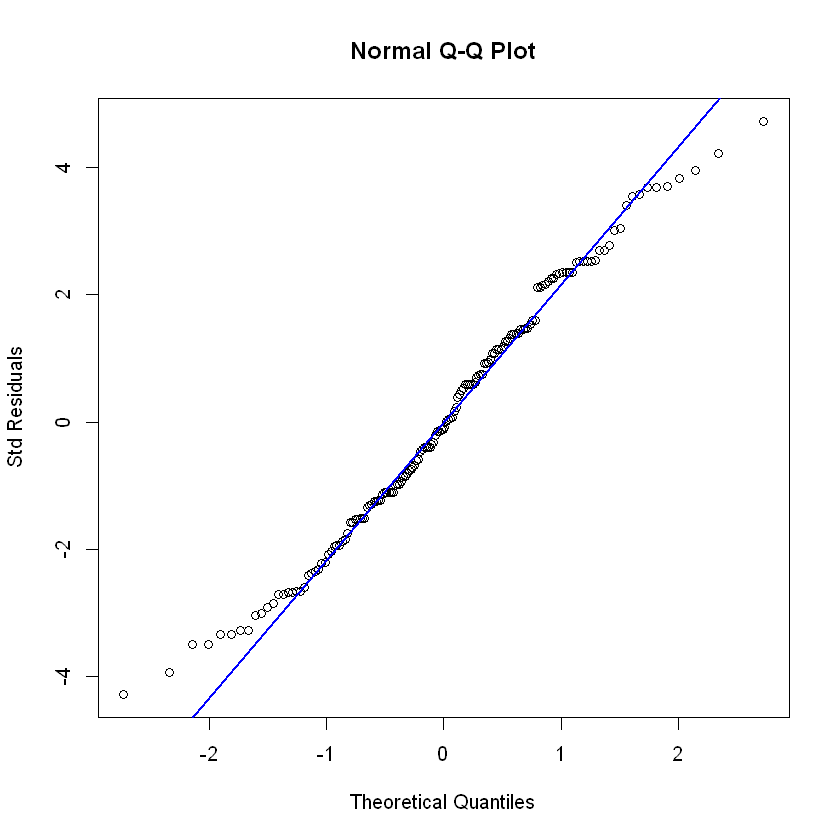

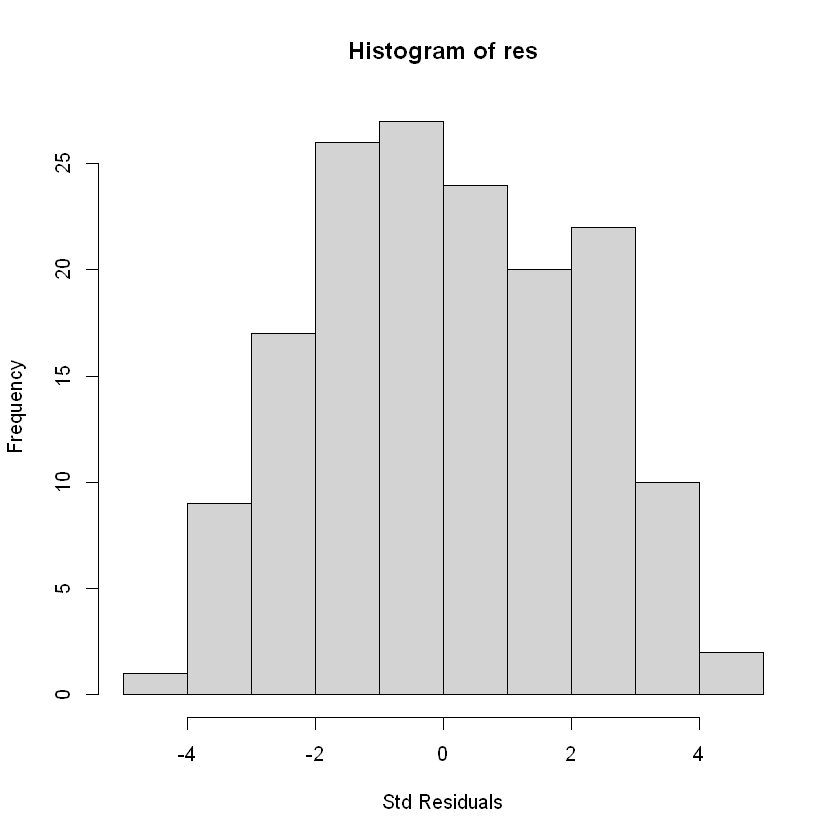

In [6]:
res = resid(model1, type="deviance")
qqnorm(res, ylab = "Std Residuals")
qqline(res,col="blue", lwd=2)
hist(res, 10, xlab="Std Residuals")

The q-q plot shows slight deviation from normal at the lower and upper quantiles while the histogram shows a normal distirubtion about the 0. These graphs suggest that model1 may be a good fit; however from the analysis completed in Q3a it was statistically shown that the model was not a good fit.

(c) 3 pts - Calculate the estimated dispersion parameter for this model. Is this an overdispersed model?

In [7]:
sum(residuals(model1, type = "deviance")^2)/model1$df.residual

[1] 4.051539

The estimated dispersion parameter for model1 is greater than 2. Therefore the model is overdispersed.

# Question 4: Fitting the full model- 23 pts

Fit a logistic regression model using *Staying* as the response variable with *Age.Group*, *Gender*, *Tenure*, *Num.Of.Products*, and *Is.Active.Member* as the predictors and logit as the link function. Ensure to include the weights parameter for specifying the number of trials. Call it **model2**. Note that Age.Group, Gender, Num.Of.Products, and Is.Active.Member should be treated as categorical variables.

In [11]:
model2 <- glm(Staying~Age.Group+Gender+Tenure+Num.Of.Products+Is.Active.Member,weights=Employees,family=binomial,data=rawdata)

summary(model2)


Call:
glm(formula = Staying ~ Age.Group + Gender + Tenure + Num.Of.Products + 
    Is.Active.Member, family = binomial, data = rawdata, weights = Employees)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.10929  -0.76949  -0.07324   0.74079   3.06551  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.109572   0.282617  -0.388    0.698    
Age.Group3         0.384480   0.267984   1.435    0.151    
Age.Group4         1.734115   0.270384   6.414 1.42e-10 ***
Age.Group5         2.955578   0.337727   8.751  < 2e-16 ***
Gender1           -0.572069   0.093776  -6.100 1.06e-09 ***
Tenure            -0.003319   0.016569  -0.200    0.841    
Num.Of.Products2  -1.410946   0.112000 -12.598  < 2e-16 ***
Is.Active.Member1 -0.850280   0.095829  -8.873  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 981.04  on 157  de

(a) 3 pts - Write down the equation for the probability of staying.

Odds of Staying = exp(-0.110 + 0.384\*Age.Group3 + 1.734\*Age.Group4 + 2.956\*Age.Group5 - 0.572\*Gender1 - 0.003\*Tenure
                      -1.411\*Num.Of.Products2 - 0.850\*Is.Active.Member1)

(b) 3 pts - Provide a meaningful interpretation for the estimated coefficients of *Tenure* and *Is.Active.Member1* with respect to the odds of staying.

A one unit increase in Tenure decreases the log odds of staying by 0.003 which corresponds to a (1-exp(-0.003) \* 100 = 0.2%) decrease in the odds of staying, keeping all other variables constant.

An active member decreases the log odds of staying by -0.85, keeping all other variables constant. This corresponds to a (1-exp(-0.85) \* 100 = 57%) decrease in the odds of staying.

(c) 3 pts - Is *Is.Active.Member1* statistically significant given the other variables in model2 at the 0.01 significance level?

Yes - the p-value of *Is.Active.Member1* is $\approx 0$ indicating it is statistically significant of 0.01 significance level.

(d) 10 pts - Has your goodness of fit been affected? Follow the instructions to repeat the tests, plots, and dispersion parameter calculation you performed in Question 3 with **model2**.

(d-1) Perform goodness-of-fit hypothesis tests using both Deviance and Pearson residuals. What do you conclude?

In [21]:
# Deviance

print("Deviance Method")
paste("The deviance residual deviance for model1 is ", deviance(model2))
paste("This correponds to a p-value of ", 1-pchisq(deviance(model2), 150))
print("The p-value is large; therefore, do not reject the null hypothesis of a good fit.")

#Pearson

print("Pearson Method")
pearson2 = residuals(model2, type="pearson")
pearson2.tvalue = sum(pearson2^2)
paste("The pearson t-value is ", pearson2.tvalue)
paste("The resulting p-value is ", 1-pchisq(pearson2.tvalue, 150))
print("The p-value is large; therefore, do not reject null hypothesis of a good fit.")

[1] "Deviance Method"


[1] "The deviance residual deviance for model1 is  162.349491002382"

[1] "This correponds to a p-value of  0.231911781800082"

[1] "The p-value is large; therefore, do not reject the null hypothesis of a good fit."
[1] "Pearson Method"


[1] "The pearson t-value is  154.155422547681"

[1] "The resulting p-value is  0.391217406550943"

[1] "The p-value is large; therefore, do not reject null hypothesis of a good fit."


(d-2) Evaluate the linearity assumption of **model2** by plotting the log-odds of Staying vs. **Tenure**. What do you conclude?

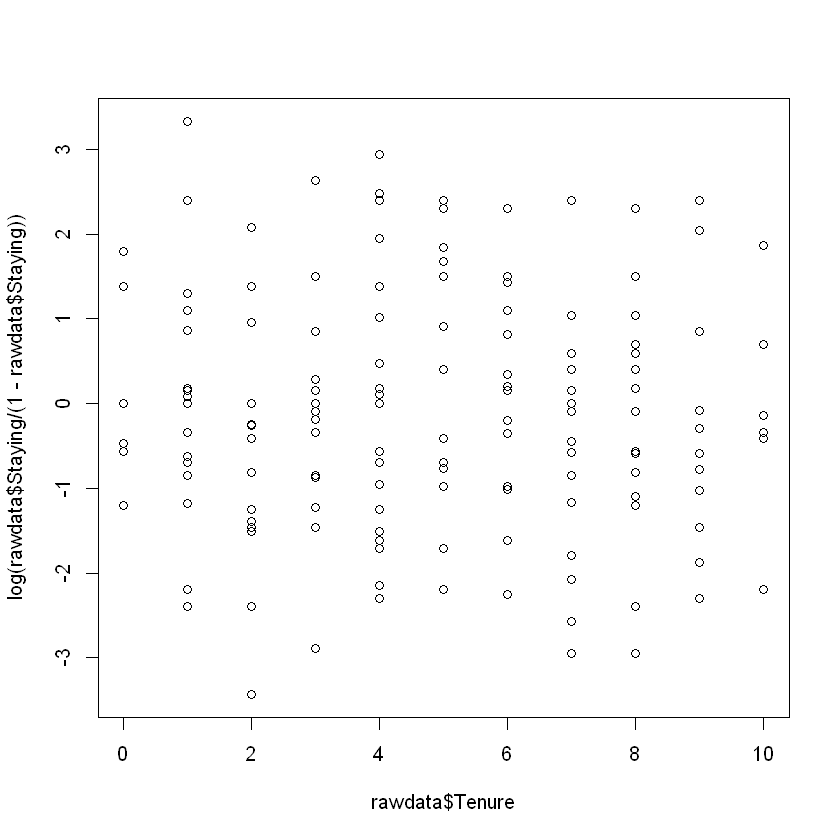

In [15]:
plot(rawdata$Tenure, log(rawdata$Staying / (1-rawdata$Staying)))

There does not seem to be a correlation between the log-odds of staying and tenue. Therefore the linearity assumption does not hold.

(d-3) Evaluate whether the deviance residuals are normally distributed by producing a QQ plot and histogram of the deviance residuals. What do you conclude?

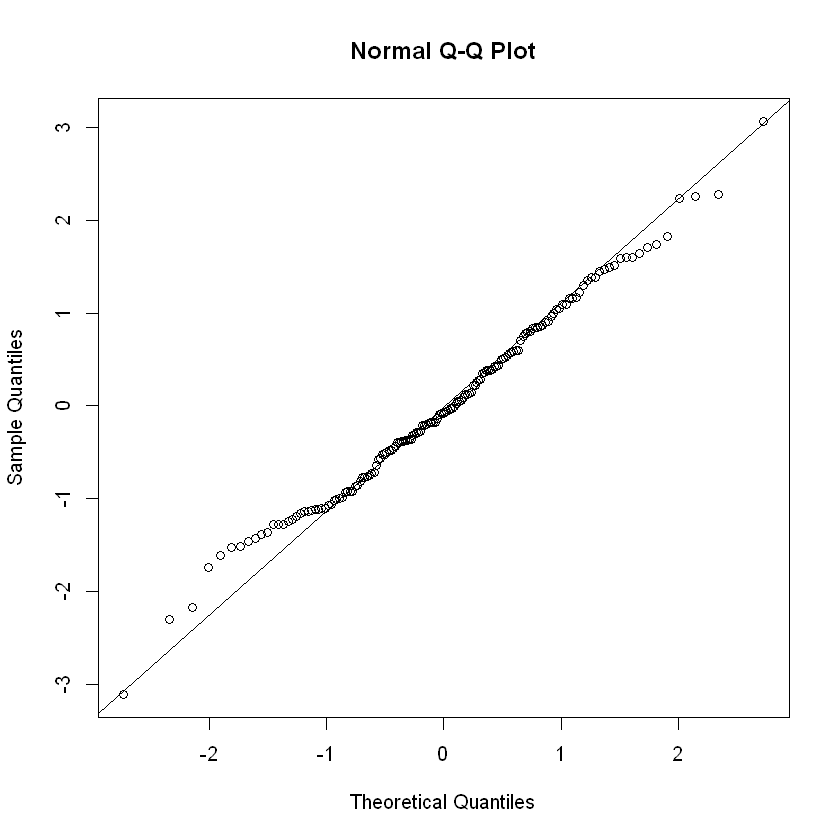

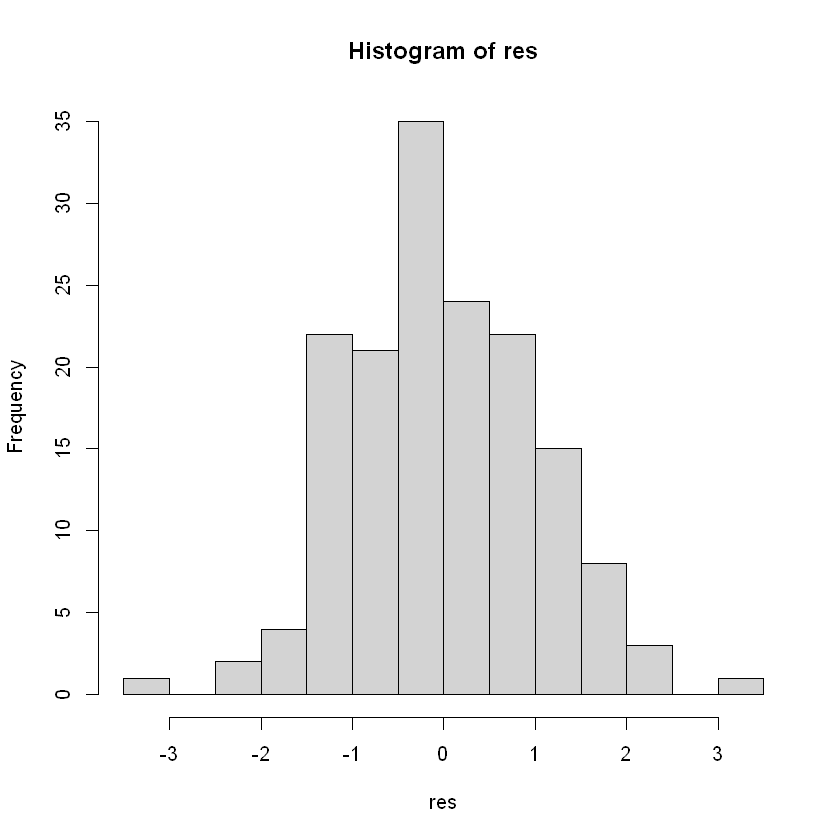

In [19]:
res = resid(model2, type="deviance")
qqnorm(res)
qqline(res)
hist(res, 10)

The qq plot seems to deviate form a normal distribution at the lower and upper tails of the distribution. The histogram plot is approximately normal about 0. Overall I would describe the deviance residuals as normally distributed.

(d-4) Calculate the estimated dispersion parameter for this model. Is this an overdispersed model?

In [20]:
sum(residuals(model2, type = "deviance")^2)/model2$df.residual

[1] 1.08233

The estimated dispersion parameter is 1.1 which indicates that the model is not overdispersed.

(e) 4 pts - Overall, would you say model2 is a good-fitting model? If so, why? If not, what would you suggest to improve the fit and why? Note: We are not asking you to spend hours finding the best possible model but to offer plausible suggestions along with your reasoning.

Yes - I would describe the model as good-fitting. This is supporting by the goodness of fit test conducted using the deviance and pearson residual methods. Further, the model is not overdispersed and the deviance residuals are approximately normal distributed.

# Question 5: Prediction - 9 pts

Suppose there is an employee with the following characteristics:

1. **Age.Group**: 2

2. **Gender**: 0

3. **Tenure**: 2

4. **Num.Of.Products**: 2

5. **Is.Active.Member**: 1

(a) 3 pts - Predict their probability of staying using model1.

In [35]:
test = rawdata[1, ]
test$Age.Group = as.factor(2)
test$Gender = as.factor(0)
test$Tenure = 2
test$Num.Of.Products = as.factor(2)
test$Is.Active.Member = as.factor(1)

pred1 = predict(model1, test, type="response")

paste("Based on the characteristics of the test point, the probability of staying is,", round(pred1, 2), "or", round(pred1, 2) * 100, "%")

[1] "Based on the characteristics of the test point, the probability of staying is, 0.2 or 20 %"

(b) 3 pts - Predict their probability of staying using model2.

In [36]:
pred2 = predict(model2, test, type="response")
paste("Based on the characteristics of the test point, the probability of staying is,", round(pred2, 2), "or", round(pred2, 2) * 100, "%")

[1] "Based on the characteristics of the test point, the probability of staying is, 0.08 or 8 %"

(c) 3 pts - Comment on how your predictions compare. i.e. which model is more reliable based on the analysis?

model2 predicted the probability of staying as 12% lower than model1. model2 performed better on the goodness of fit test; therefore, I woudl describe the prediction of model2 as more reliable.